In [1]:
import pandas as pd
import numpy as np
import csv
pd.set_option('display.max_columns', 380)
pd.set_option('display.width', 140)
pd.set_option('display.max_rows', 380)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline

reading data

In [2]:
absent = pd.read_csv('F:/EdwisorProject2/Absenteeism_at_work_Project.csv')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [4]:
absent.shape

(740, 21)

In [5]:
absent.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day               object
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [6]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [7]:
absent.loc[:,'Work load Average/day '].head()

0    239,554
1    239,554
2    239,554
3    239,554
4    239,554
Name: Work load Average/day , dtype: object

Removing ',' from 'Work load Average/day ' column

In [8]:
absent['Work load Average/day '] = absent['Work load Average/day '].str.replace(',','')

In [9]:
absent['Work load Average/day ' ].head()

0    239554
1    239554
2    239554
3    239554
4    239554
Name: Work load Average/day , dtype: object

# Removing observations with 'Absenteeism time in hours' equal to zero

In [10]:
absent = absent.loc[absent['Absenteeism time in hours']!= 0,:]

In [11]:
absent.shape

(704, 21)

# Missing values Analysis

In [12]:
absent.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

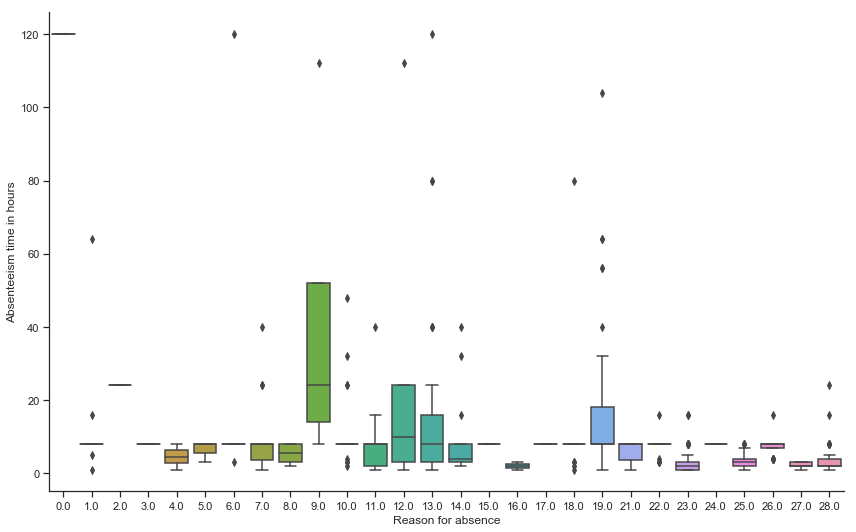

In [13]:
sns.catplot(x='Reason for absence', y="Absenteeism time in hours", kind="box", data=absent,height=7.5,aspect=12/7.5)

Putting null values of 'Reason for absence' column equal to 27(i.e. physiotherapy) since absenteeism hours are < 10.

In [14]:
absent.loc[absent['Reason for absence'].isnull(),'Reason for absence'] = 27

Putting zero category of 'Reason for absence' column equal to 26(i.e. unjustified absence).

In [15]:
absent.loc[absent['Reason for absence']==0,'Reason for absence'] = 26

In [16]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Putting 'Month of absence' null value equal to 10

In [17]:
absent.loc[absent['Month of absence'].isnull(),'Month of absence'] = 10

In [18]:
absent .isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

'Transportation expense' depends on 'Distance from Residence to Work' so we will use 'Distance from Residence to Work' values to impute missing values in 'Transportation expense' 

In [19]:
absent.loc[(absent['Transportation expense'].isnull()) & (absent['Distance from Residence to Work']==51),\
'Transportation expense'] = absent.loc[absent['Distance from Residence to Work']==51,'Transportation expense'].mode()[0]

In [20]:
absent.loc[(absent['Transportation expense'].isnull()) & (absent['Distance from Residence to Work']==50),\
'Transportation expense'] = absent.loc[absent['Distance from Residence to Work']==50,'Transportation expense'].mode()[0]

In [21]:
absent.loc[(absent['Transportation expense'].isnull()) & (absent['Distance from Residence to Work']==52),\
'Transportation expense'] = absent.loc[absent['Distance from Residence to Work']==52,'Transportation expense'].mode()[0]

In [22]:
absent.loc[(absent['Transportation expense'].isnull()) & (absent['Distance from Residence to Work']==11),\
'Transportation expense'] = absent.loc[absent['Distance from Residence to Work']==11,'Transportation expense'].mode()[0]

In [23]:
absent.loc[(absent['Transportation expense'].isnull()) & (absent['Distance from Residence to Work']==31),\
'Transportation expense'] = absent.loc[absent['Distance from Residence to Work']==31,'Transportation expense'].mode()[0]

In [24]:
absent.loc[(absent['Transportation expense'].isnull()) & (absent['ID']==22),\
'Transportation expense'] = absent.loc[absent['ID']==22,'Transportation expense'].mode()[0]

In [25]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Using 'ID' column to impute missing value for 'Distance from Residence to Work'

In [26]:
absent.loc[(absent['Distance from Residence to Work'].isnull()) & (absent['ID']==34),\
'Distance from Residence to Work'] = absent.loc[absent['ID']==34,'Distance from Residence to Work'].mode()[0]

In [27]:
absent.loc[(absent['Distance from Residence to Work'].isnull()) & (absent['ID']==22),\
'Distance from Residence to Work'] = absent.loc[absent['ID']==22,'Distance from Residence to Work'].mode()[0]

In [28]:
absent.loc[(absent['Distance from Residence to Work'].isnull()) & (absent['ID']==28),\
'Distance from Residence to Work'] = absent.loc[absent['ID']==28,'Distance from Residence to Work'].mode()[0]

In [29]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Using 'ID' column to impute missing values for 'Service time' 

In [30]:
absent.loc[(absent['Service time'].isnull()) & (absent['ID']==34),\
'Service time'] = absent.loc[absent['ID']==34,'Service time'].mode()[0]

In [31]:
absent.loc[(absent['Service time'].isnull()) & (absent['ID']==28),\
'Service time'] = absent.loc[absent['ID']==28,'Service time'].mode()[0]

In [32]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Using 'ID' column to impute missing values for 'Age' 

In [33]:
absent.loc[(absent['Age'].isnull()) & (absent['ID']==24),\
'Age'] = absent.loc[absent['ID']==24,'Age'].mode()[0]

In [34]:
absent.loc[(absent['Age'].isnull()) & (absent['ID']==28),\
'Age'] = absent.loc[absent['ID']==28,'Age'].mode()[0]

In [35]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

'Work load Average/day' values are dependent upon 'Month of absence' and 'Hit target' values

In [36]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [37]:
for i in [(9,92),(10,93),(11,93),(12,97),(1,95),(5,92)]:
    absent.loc[((absent['Work load Average/day '].isnull()) & (absent['Month of absence']==i[0])) & (absent['Hit target']==i[1]),\
    'Work load Average/day '] = absent.loc[(absent['Month of absence']==i[0]) & (absent['Hit target']==i[1]),\
    'Work load Average/day '].mode()[0]

In [38]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

'Hit target' values are dependent upon 'Month of absence' and 'Work load Average/day' values

In [39]:
for i in [(11,'306345'),(12,'261306'),(1,'308593')]:
    absent.loc[((absent['Hit target'].isnull()) & (absent['Month of absence']==i[0])) & (absent['Work load Average/day ']==i[1]),\
    'Hit target'] = absent.loc[(absent['Month of absence']==i[0]) & (absent['Work load Average/day ']==i[1]),\
    'Hit target'].mode()[0]

In [40]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

'Disciplinary failure' missing values have been put to 0

In [41]:
absent.loc[absent['Disciplinary failure'].isnull(),'Disciplinary failure'] = 0

In [42]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Using 'ID' column to impute missing values for 'Education'.

In [43]:
for i in [11,10,34,14,24]:
    absent.loc[(absent['Education'].isnull()) & (absent['ID']==i),'Education'] = absent.loc[absent['ID']==i,'Education'].mode()[0]

In [44]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Using 'ID' column to impute missing values for 'Son'.

In [45]:
for i in [20,14,34,27,1]:
    absent.loc[(absent['Son'].isnull()) & (absent['ID']==i),'Son'] = absent.loc[absent['ID']==i,'Son'].mode()[0]

In [46]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Using 'ID' column to impute missing values for 'Social drinker'.

In [47]:
for i in [10,14,17]:
    absent.loc[(absent['Social drinker'].isnull()) & (absent['ID']==i),'Social drinker'] = absent.loc[absent['ID']==i,'Social drinker'].mode()[0]

In [48]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Using 'ID' column to impute missing values for 'Social smoker'.

In [49]:
for i in [34,1,11,15]:
    absent.loc[(absent['Social smoker'].isnull()) & (absent['ID']==i),'Social smoker'] = absent.loc[absent['ID']==i,'Social smoker'].mode()[0]

In [50]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

Using 'ID' to impute missing values for 'Pet','Weight','Height','Body mass index'

In [51]:
for i in [1,13]:
    absent.loc[(absent['Pet'].isnull()) & (absent['ID']==i),'Pet'] = absent.loc[absent['ID']==i,'Pet'].mode()[0]

In [52]:
for i in [27]:
    absent.loc[(absent['Weight'].isnull()) & (absent['ID']==i),'Weight'] = absent.loc[absent['ID']==i,'Weight'].mode()[0]

In [53]:
for i in [20,10,28,34,27,11,5,22,13,24,32]:
    absent.loc[(absent['Height'].isnull()) & (absent['ID']==i),'Height'] = absent.loc[absent['ID']==i,'Height'].mode()[0]

In [54]:
for i in [3,24,11,30,2,19,34,28,13,36,14,20,18,17,15,22,5]:
    absent.loc[(absent['Body mass index'].isnull()) & (absent['ID']==i),'Body mass index'] = absent.loc[absent['ID']==i,'Body mass index'].mode()[0]

In [55]:
absent.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          22
dtype: int64

Using 'Reason for absence' for imputing missing values in 'Absenteeism time in hours'

In [56]:
for i in [23,14,10,22,26,6,28,11,13]:
    absent.loc[(absent['Absenteeism time in hours'].isnull()) & (absent['Reason for absence']==i),'Absenteeism time in hours'] = absent.loc[absent['Reason for absence']==i,'Absenteeism time in hours'].median()

In [57]:
absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# All missing values have been imputed.

Converting 'Work load Average/day' variable from object to int type.

In [58]:
absent.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day               object
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [59]:
absent['Work load Average/day '] = absent['Work load Average/day '].astype('int')

# Continuous Variables Distributions

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


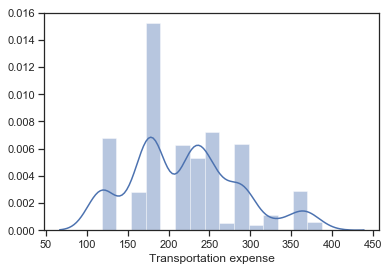

In [60]:
sns.distplot(absent['Transportation expense'])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


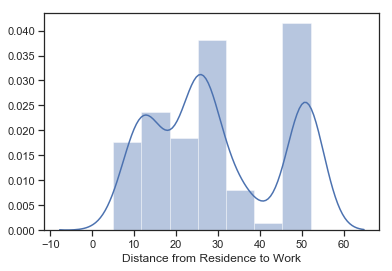

In [61]:
sns.distplot(absent['Distance from Residence to Work'])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


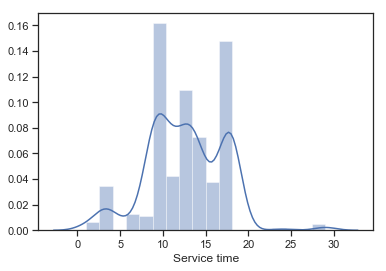

In [62]:
sns.distplot(absent['Service time'])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


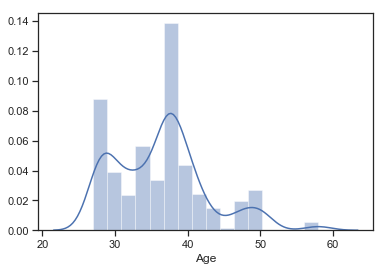

In [63]:
sns.distplot(absent['Age'])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


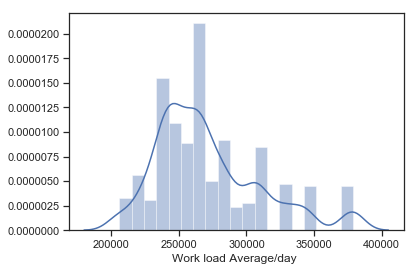

In [64]:
sns.distplot(absent['Work load Average/day '])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


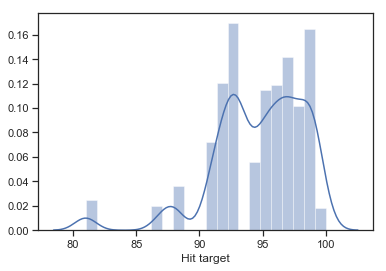

In [65]:
sns.distplot(absent['Hit target'])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


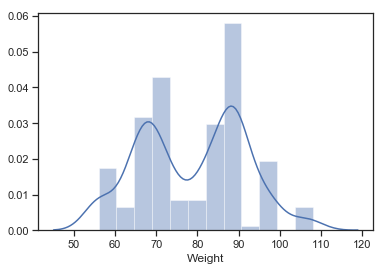

In [66]:
sns.distplot(absent['Weight'])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


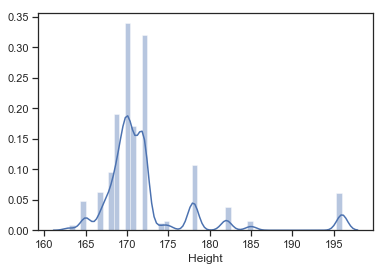

In [67]:
sns.distplot(absent['Height'])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


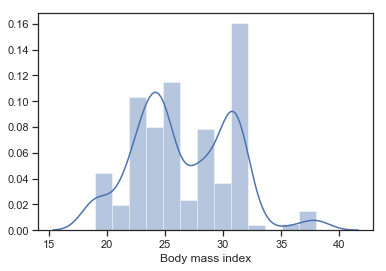

In [68]:
sns.distplot(absent['Body mass index'])

# All continuous variables have skewed distributions

# Outlier Analysis for continuous variables

In [69]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

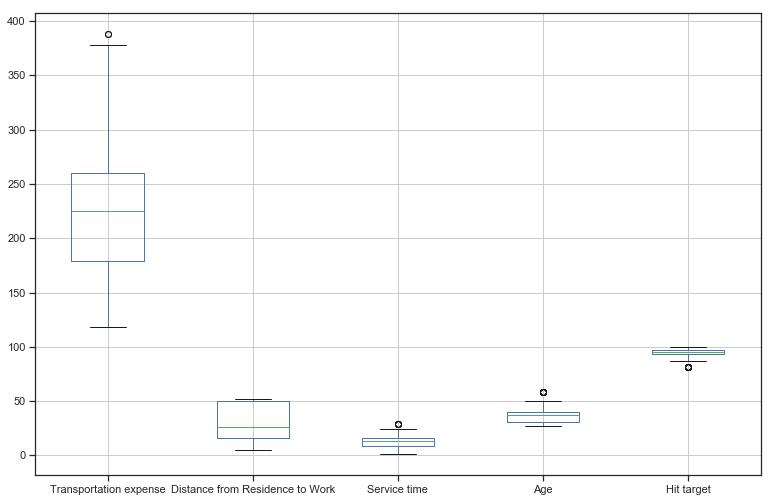

In [70]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 8.5
plt.rcParams["figure.figsize"] = fig_size
absent.boxplot(column=['Transportation expense','Distance from Residence to Work', 'Service time', 'Age','Hit target'])

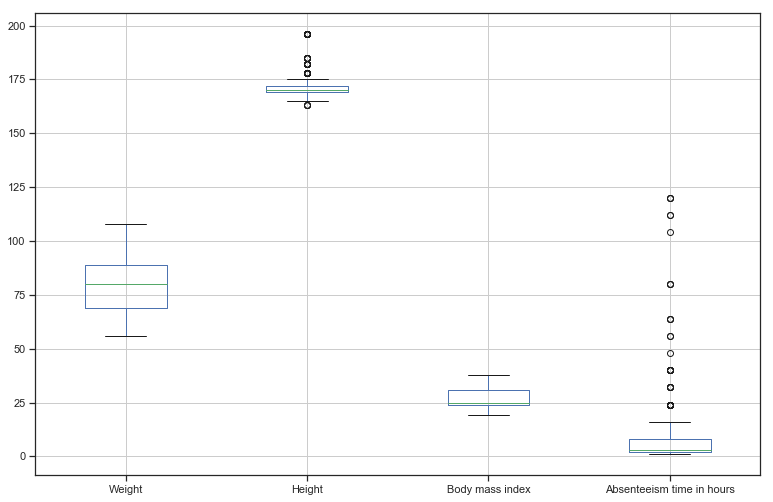

In [71]:
absent.boxplot(column = ['Weight', 'Height', 'Body mass index','Absenteeism time in hours'])

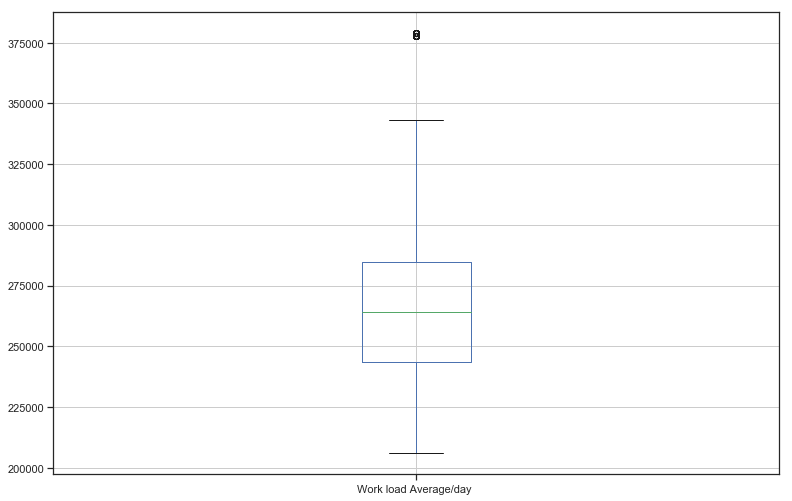

In [72]:
absent.boxplot(column=['Work load Average/day '])

Capping outliers

In [73]:
for i in ['Transportation expense','Service time','Age','Work load Average/day ','Hit target','Height',\
'Absenteeism time in hours']:
    q75,q25 = np.percentile(absent.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    absent.loc[absent[i] < min,i] = min
    absent.loc[absent[i] > max,i] = max

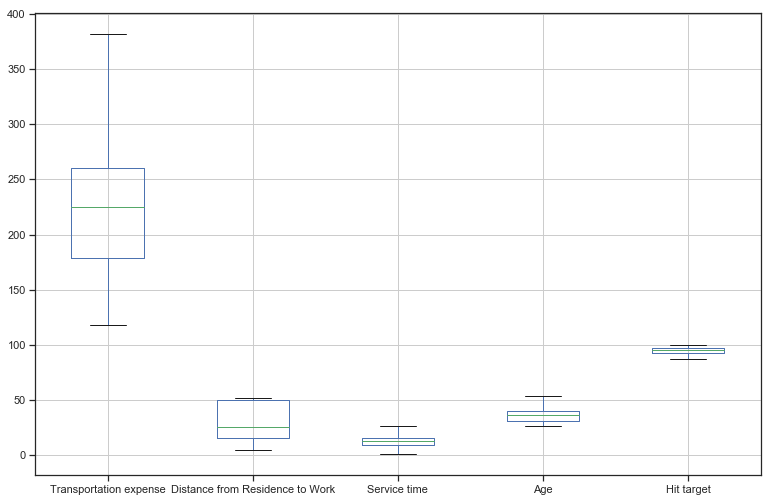

In [74]:
absent.boxplot(column=['Transportation expense','Distance from Residence to Work', 'Service time', 'Age','Hit target'])

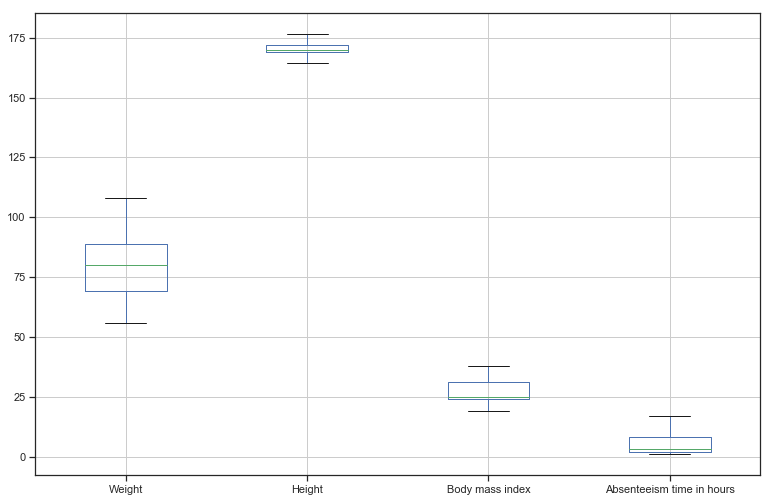

In [75]:
absent.boxplot(column = ['Weight', 'Height', 'Body mass index','Absenteeism time in hours'])

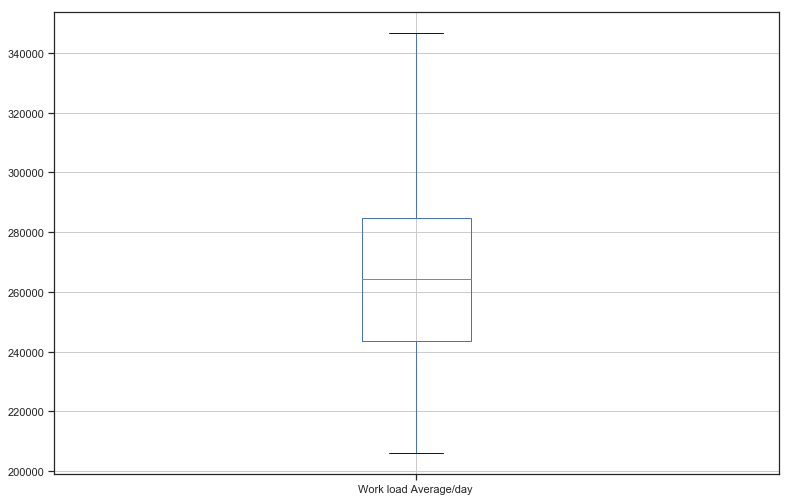

In [76]:
absent.boxplot(column=['Work load Average/day '])

# Correlation Analysis

Converting variables to categorical variables

In [77]:
catcols = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons','Disciplinary failure','Education',\
'Son', 'Social drinker', 'Social smoker', 'Pet']

In [78]:
for i in catcols:
    absent[i] = absent[i].astype('category')

In [79]:
absent.dtypes

ID                                    int64
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

Doing Chi-square test for correlation between categorical variables

In [80]:
from scipy.stats import chi2_contingency

In [81]:
factors_paired = [(i,j) for i in catcols for j in catcols] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(absent[f[0]], absent[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((10,10))
p1 = pd.DataFrame(p1, index=catcols, columns=catcols)
p1

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
Reason for absence,0.000000e+00,2.328978e-15,6.131313e-02,5.901286e-21,4.768228e-13,1.749968e-10,1.741446e-18,1.711278e-08,1.914852e-08,9.402040e-19
Month of absence,2.328978e-15,0.000000e+00,6.087582e-01,0.000000e+00,4.180979e-01,8.639891e-03,3.123398e-05,2.363939e-02,3.194987e-02,5.667973e-05
Day of the week,6.131313e-02,6.087582e-01,0.000000e+00,3.948001e-01,2.460672e-01,5.439849e-01,2.223057e-09,3.575265e-01,8.227146e-01,4.046197e-01
Seasons,5.901286e-21,0.000000e+00,3.948001e-01,0.000000e+00,2.425953e-02,6.286186e-02,1.059010e-05,1.981972e-01,1.569992e-01,1.772464e-04
Disciplinary failure,4.768228e-13,4.180979e-01,2.460672e-01,2.425953e-02,0.000000e+00,9.094792e-01,4.545640e-01,6.721064e-01,2.660185e-03,7.200002e-01
Education,1.749968e-10,8.639891e-03,5.439849e-01,6.286186e-02,9.094792e-01,0.000000e+00,9.146983e-12,3.391862e-34,1.984123e-24,1.176649e-29
Son,1.741446e-18,3.123398e-05,2.223057e-09,1.059010e-05,4.545640e-01,9.146983e-12,0.000000e+00,3.706723e-09,4.132435e-21,2.225197e-88
Social drinker,1.711278e-08,2.363939e-02,3.575265e-01,1.981972e-01,6.721064e-01,3.391862e-34,3.706723e-09,0.000000e+00,1.515194e-02,1.196121e-26
Social smoker,1.914852e-08,3.194987e-02,8.227146e-01,1.569992e-01,2.660185e-03,1.984123e-24,4.132435e-21,1.515194e-02,0.000000e+00,5.706486e-14
Pet,9.402040e-19,5.667973e-05,4.046197e-01,1.772464e-04,7.200002e-01,1.176649e-29,2.225197e-88,1.196121e-26,5.706486e-14,0.000000e+00


Dropping Seasons since p-value of 'Seasons' versus 'Month of absence' is 0.00(<0.05) rejecting null hypothesis that the two variables are independent.

In [82]:
absent = absent.drop(['Seasons'],axis=1)

Correlation test for continuous independent variables

In [83]:
contcols = ['Transportation expense','Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',\
'Hit target','Weight', 'Height', 'Body mass index']

In [84]:
absent.loc[:,contcols].corr()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index
Transportation expense,1.000000,0.269155,-0.350778,-0.228578,-0.017599,-0.076202,-0.194536,-0.160943,-0.120601
Distance from Residence to Work,0.269155,1.000000,0.132584,-0.135683,-0.071586,-0.002709,-0.027558,-0.342810,0.141660
Service time,-0.350778,0.132584,1.000000,0.691383,-0.000400,0.013905,0.459509,-0.091502,0.508165
Age,-0.228578,-0.135683,0.691383,1.000000,-0.054285,-0.015695,0.429993,0.005210,0.487372
Work load Average/day,-0.017599,-0.071586,-0.000400,-0.054285,1.000000,-0.046530,-0.054656,0.033051,-0.106928
Hit target,-0.076202,-0.002709,0.013905,-0.015695,-0.046530,1.000000,-0.006818,0.061310,-0.039986
Weight,-0.194536,-0.027558,0.459509,0.429993,-0.054656,-0.006818,1.000000,0.285272,0.901149
Height,-0.160943,-0.342810,-0.091502,0.005210,0.033051,0.061310,0.285272,1.000000,-0.091097
Body mass index,-0.120601,0.141660,0.508165,0.487372,-0.106928,-0.039986,0.901149,-0.091097,1.000000


No two variables have correlation coeff. > 0.95 so we will not drop any continuous independent variables.

# Relationships of categorical independent variables with dependent variable

'Reason for absence' Vs. 'Absenteeism time in hours'

In [85]:
def relationship(a,b):
    df = absent.groupby(a)[b].sum()
    df = df.reset_index()
    df[b] = df[b]*100/sum(absent[b])
    df = df.sort_values(by=['Absenteeism time in hours'])
    print(df)
    return df.plot.barh(x=a,y=b)

   Reason for absence  Absenteeism time in hours
15               16.0                   0.158520
2                 3.0                   0.211361
16               17.0                   0.211361
3                 4.0                   0.237781
14               15.0                   0.422721
1                 2.0                   0.449141
4                 5.0                   0.501982
22               24.0                   0.634082
7                 8.0                   0.845443
19               21.0                   0.924703
8                 9.0                   1.532365
5                 6.0                   1.796565
11               12.0                   2.060766
23               25.0                   2.853369
6                 7.0                   2.985469
13               14.0                   3.302510
0                 1.0                   3.566711
17               18.0                   4.068692
10               11.0                   4.280053
25               27.

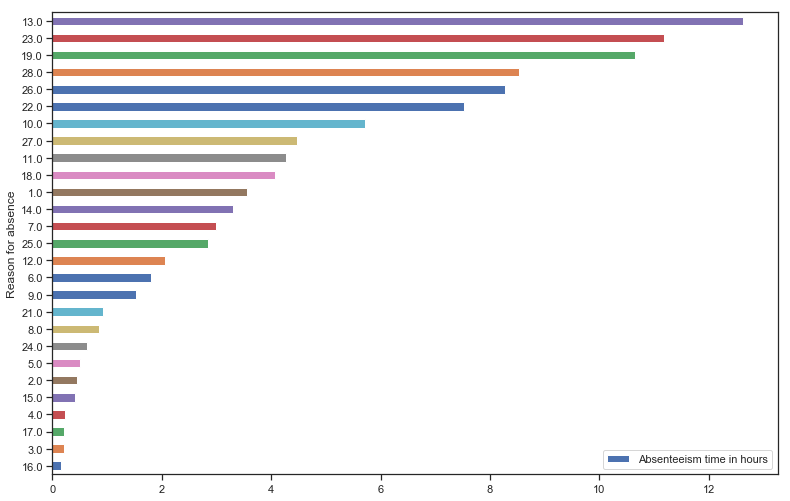

In [86]:
relationship('Reason for absence','Absenteeism time in hours')

Top 3 categories in order of Absenteeism time are:
1. Category 13:Diseases of the musculoskeletal system and connective tissue - 12.62 % of total time
2. Category 23:medical consultation - 11.17 % of total time
3. Category 19:Injury, poisoning and certain other consequences of external causes - 10.64 % of total time
4. Category 28:dental consultation - 8.53 % 0f total time
5. Category 26:unjustified absence - 8.27 % of total time

Conclusions & possible remedies:
1. Musculoskeletal system disease is the major reason of absenteeism. Bad working posture & high workload are possible reasons for the high incidence of musculoskeletal disease. Company should conduct a study on the working postures of people and go for more ergonomic workplace design. Company should try to optimize workload keeping in mind occupational health of working people.
2. Medical consultation may be brought down by optimizing workloads.
3. Injury incidence may be reduced by creating proper ergonomic working setup.
4. Dental consultation time may be reduced by informing employees of the dental health guidelines so that they can take better care of their teeth.
5. Unjustified absence is too high.Company should try to reduce high workloads so that employees don't feel work stress and take unjustified absence leave.

'Month of absence' Vs. 'Absenteeism time in hours'

   Month of absence  Absenteeism time in hours
0               1.0                   5.284016
11             12.0                   6.367239
8               9.0                   6.552180
7               8.0                   7.001321
1               2.0                   7.582563
5               6.0                   8.031704
3               4.0                   8.243065
4               5.0                   8.348745
9              10.0                   8.348745
10             11.0                   8.824306
6               7.0                  11.387054
2               3.0                  14.029062


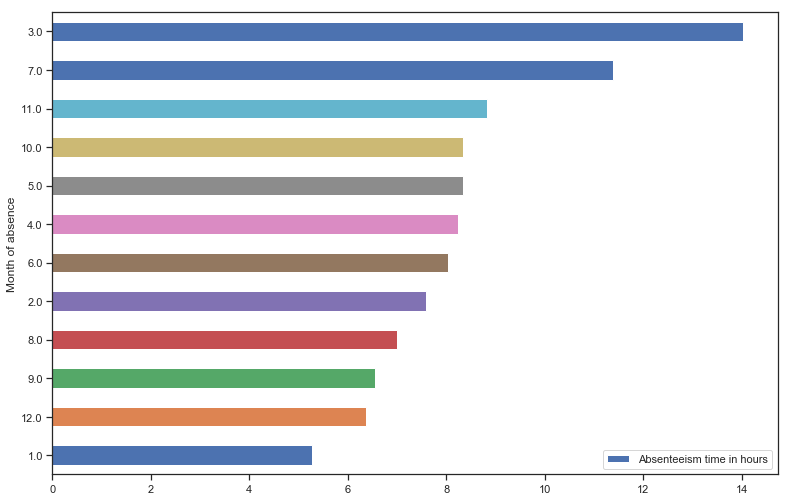

In [87]:
relationship('Month of absence','Absenteeism time in hours')

Top 3 months in order of Absenteeism time are:

1. Month 3:March - 14.02 % of total time
2. Month 7:July - 11.38 % of total time
3. Month 11:November - 8.82 % of total time

'Day of the week' Vs. 'Absenteeism time in hours'

  Day of the week  Absenteeism time in hours
3               5                  14.848085
4               6                  16.301189
1               3                  20.634082
2               4                  22.192867
0               2                  26.023778


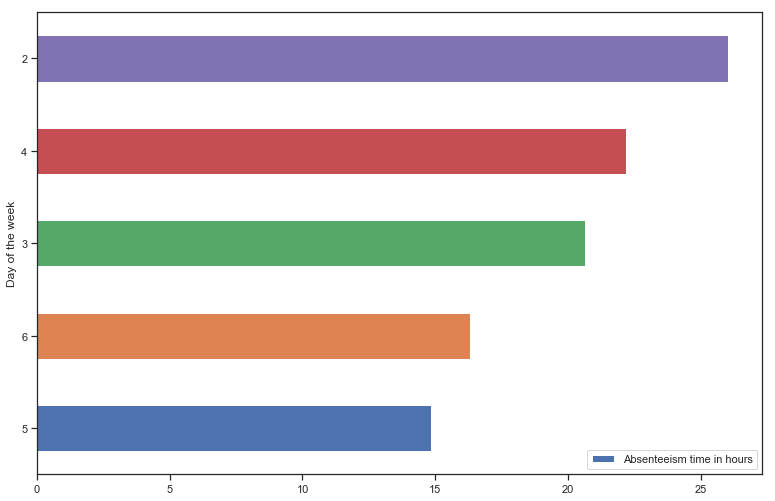

In [88]:
relationship('Day of the week','Absenteeism time in hours')

Top 3 days in order of Absenteeism time are:

1. Day 2:Monday - 26.02 % of total time
2. Day 4:Wednesday - 22.19 % of total time
3. Day 3:Tuesday - 20.63 % of total time

'Education' Vs. 'Absenteeism time in hours'

  Education  Absenteeism time in hours
3       4.0                   0.554822
1       2.0                   6.974901
2       3.0                   9.775429
0       1.0                  82.694848


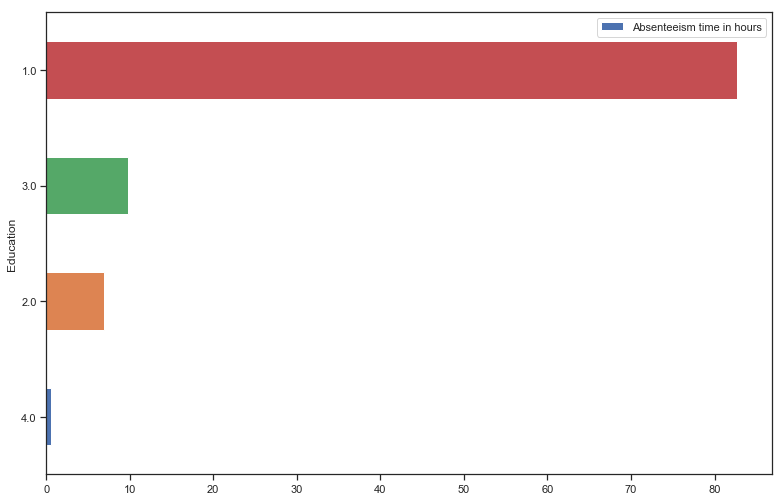

In [89]:
relationship('Education','Absenteeism time in hours')

82.69 % of absenteeism time is contributed by people having high school education.
This may be due to majority of people having high school education. No conclusion may be drawn from this graph.

'Son' Vs. 'Absenteeism time in hours'

   Son  Absenteeism time in hours
3  3.0                   2.985469
4  4.0                   6.631440
2  2.0                  27.080581
1  1.0                  27.239102
0  0.0                  36.063408


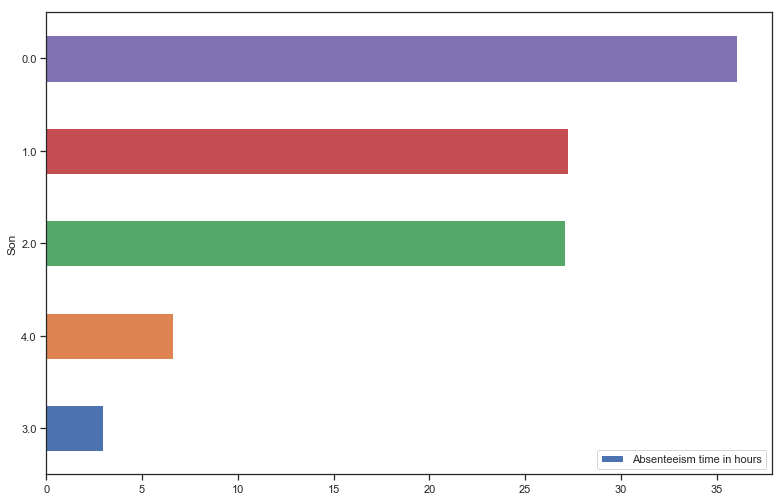

In [90]:
relationship('Son','Absenteeism time in hours')

Top 3 categories in order of Absenteeism time are:

1. Category 0:No son - 36.06 % of total time
2. Category 1:One son - 27.23 % of total time
3. Category 2:Two sons - 27.08 % of total time

People with no son are taking most of absenteeism time.

'Pet' Vs. 'Absenteeism time in hours'

   Pet  Absenteeism time in hours
4  5.0                   0.660502
5  8.0                   0.898283
3  4.0                   5.574637
2  2.0                   9.537649
1  1.0                  21.083223
0  0.0                  62.245707


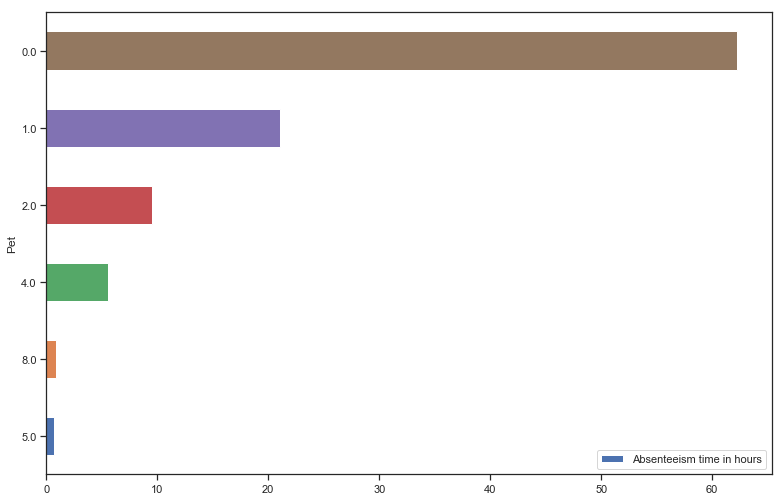

In [91]:
relationship('Pet','Absenteeism time in hours')

Top 3 categories in order of Absenteeism time are:

1. Category 0:No pet - 62.24 % of total time
2. Category 1:One pet - 21.08 % of total time
3. Category 2:Two pets - 9.53 % of total time

People with no pet are taking most of absenteeism time.

# Relationships of continuous independent variables with dependent variable

In [92]:
cols1 = ['Transportation expense','Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',\
'Hit target','Weight', 'Height', 'Body mass index','Absenteeism time in hours']
absent.loc[:,cols1].corr()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.269155,-0.350778,-0.228578,-0.017599,-0.076202,-0.194536,-0.160943,-0.120601,0.186368
Distance from Residence to Work,0.269155,1.000000,0.132584,-0.135683,-0.071586,-0.002709,-0.027558,-0.342810,0.141660,-0.066372
Service time,-0.350778,0.132584,1.000000,0.691383,-0.000400,0.013905,0.459509,-0.091502,0.508165,-0.034384
Age,-0.228578,-0.135683,0.691383,1.000000,-0.054285,-0.015695,0.429993,0.005210,0.487372,0.005265
Work load Average/day,-0.017599,-0.071586,-0.000400,-0.054285,1.000000,-0.046530,-0.054656,0.033051,-0.106928,0.112240
Hit target,-0.076202,-0.002709,0.013905,-0.015695,-0.046530,1.000000,-0.006818,0.061310,-0.039986,-0.021094
Weight,-0.194536,-0.027558,0.459509,0.429993,-0.054656,-0.006818,1.000000,0.285272,0.901149,0.030329
Height,-0.160943,-0.342810,-0.091502,0.005210,0.033051,0.061310,0.285272,1.000000,-0.091097,0.102118
Body mass index,-0.120601,0.141660,0.508165,0.487372,-0.106928,-0.039986,0.901149,-0.091097,1.000000,-0.029203
Absenteeism time in hours,0.186368,-0.066372,-0.034384,0.005265,0.112240,-0.021094,0.030329,0.102118,-0.029203,1.000000


Correlation of every continuous independent variable with dependent variable('Absenteeism time in hours') is < 0.2 which means that no independent variable has strong relationship with dependent variable.

# Forecasting absenteeism time in hours per month for 2011

In [93]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
2,3,23.0,7.0,4,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0


Aggregating absence hrs. by month

In [94]:
monthly_absence = absent.groupby('Month of absence')['Absenteeism time in hours'].sum()
monthly_absence

Month of absence
1.0     200.0
2.0     287.0
3.0     531.0
4.0     312.0
5.0     316.0
6.0     304.0
7.0     431.0
8.0     265.0
9.0     248.0
10.0    316.0
11.0    334.0
12.0    241.0
Name: Absenteeism time in hours, dtype: float64

In [95]:
monthly_absence = monthly_absence.reset_index()
monthly_absence

,Month of absence,Absenteeism time in hours
0,1.0,200.0
1,2.0,287.0
2,3.0,531.0
3,4.0,312.0
4,5.0,316.0
5,6.0,304.0
6,7.0,431.0
7,8.0,265.0
8,9.0,248.0
9,10.0,316.0


Divinding absence hrs. by 3 since this data is of 3 years from July,2007 to June,2010

In [96]:
monthly_absence['absenteeism hours per month'] = monthly_absence['Absenteeism time in hours']/3

In [97]:
monthly_absence['Month of absence'] = monthly_absence['Month of absence'].astype('int')
monthly_absence

,Month of absence,Absenteeism time in hours,absenteeism hours per month
0,1,200.0,66.666667
1,2,287.0,95.666667
2,3,531.0,177.000000
3,4,312.0,104.000000
4,5,316.0,105.333333
5,6,304.0,101.333333
6,7,431.0,143.666667
7,8,265.0,88.333333
8,9,248.0,82.666667
9,10,316.0,105.333333


In [98]:
monthly_absence = monthly_absence.set_index('Month of absence')

In [99]:
monthly_absence = monthly_absence.drop(['Absenteeism time in hours'],axis=1)

In [100]:
ts = monthly_absence['absenteeism hours per month']

In [101]:
ts

Month of absence
1      66.666667
2      95.666667
3     177.000000
4     104.000000
5     105.333333
6     101.333333
7     143.666667
8      88.333333
9      82.666667
10    105.333333
11    111.333333
12     80.333333
Name: absenteeism hours per month, dtype: float64

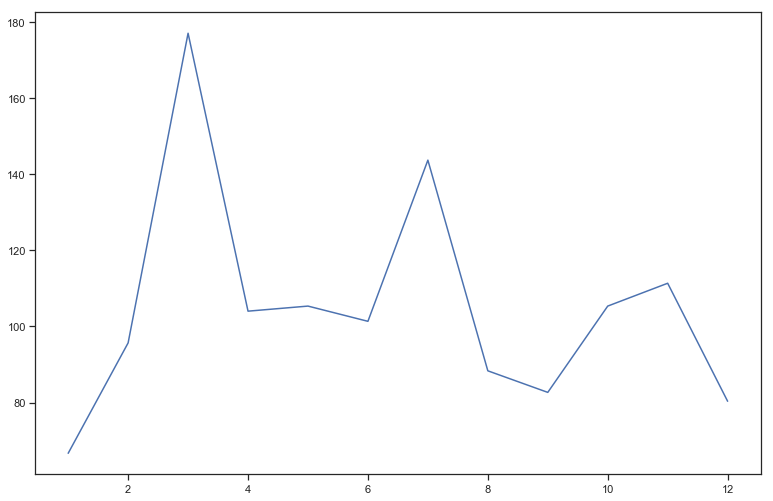

In [102]:
plt.plot(ts)

Performing Dickey Fuller test for stationarity

In [103]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts,autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64

Since Test Statistic > Critical Values for 1%, 5% & 10%, time series is not stationary.

In [104]:
ts_log = np.log(ts)

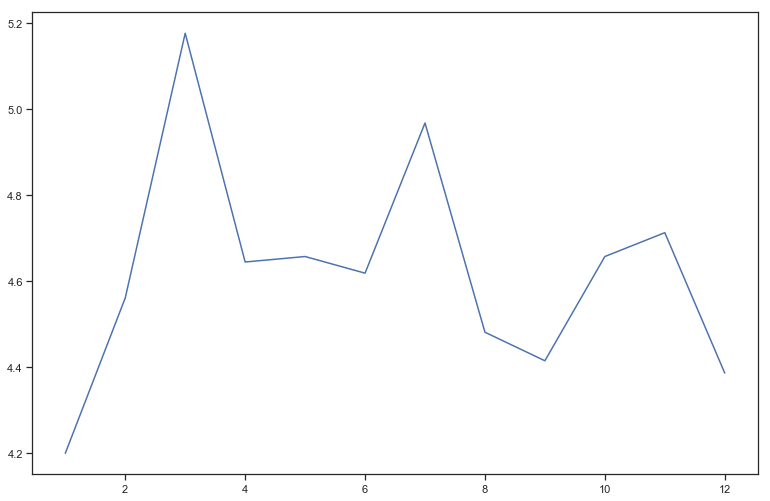

In [105]:
plt.plot(ts_log)

In [106]:
ts_diff = ts_log - ts_log.shift()

In [107]:
ts_diff

Month of absence
1          NaN
2     0.361165
3     0.615280
4    -0.531759
5     0.012739
6    -0.038715
7     0.349080
8    -0.486378
9    -0.066301
10    0.242313
11    0.055399
12   -0.326344
Name: absenteeism hours per month, dtype: float64

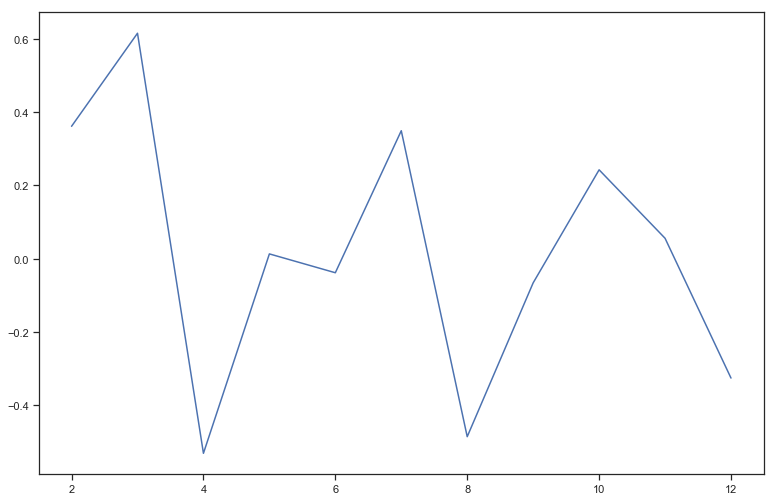

In [108]:
plt.plot(ts_diff)

In [109]:
ts_diff.fillna(0,inplace=True)

In [110]:
dftest = adfuller(ts_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -3.069239
p-value                         0.028915
#Lags Used                      1.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64

Since Test Statistic(-3.069239) < Critical Value for 10% (-2.748700), timeseries ts_diff is stationary.

In [111]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=10)
lag_pacf = pacf(ts_diff, nlags=10, method='ols')

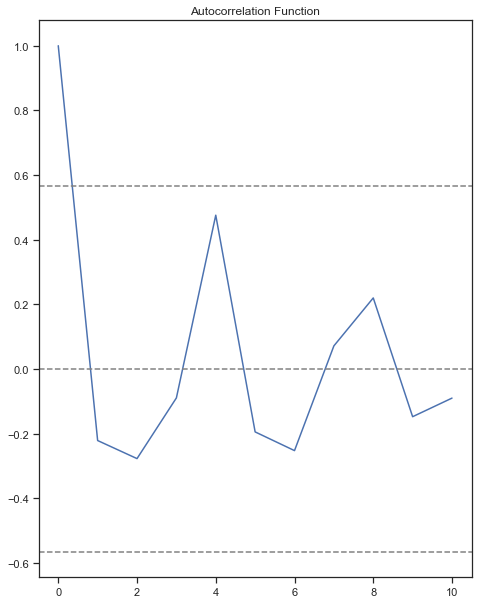

In [112]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

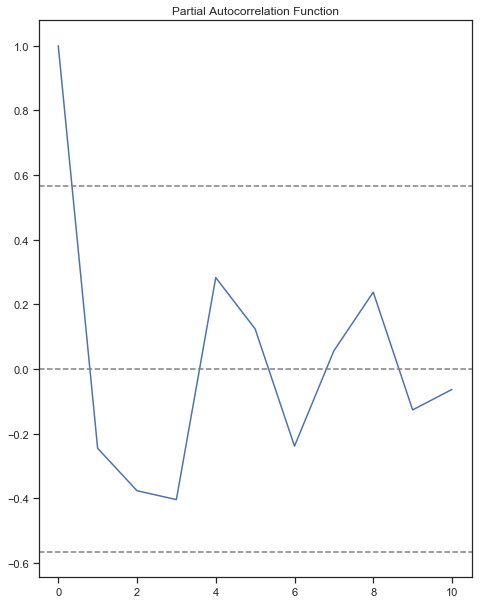

In [113]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

p = 0 and q = 0 from the above charts. We will have to check for various values of p & q.

In [114]:
from statsmodels.tsa.arima_model import ARIMA

In [115]:
model = ARIMA(ts_diff, order=(3, 0, 0))

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [116]:
results_AR = model.fit(disp=-1)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HP\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HP\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

In [117]:
results_AR.fittedvalues

Month of absence
1     0.001786
2     0.002100
3    -0.092374
4    -0.613604
5    -0.336879
6    -0.053862
7     0.378448
8    -0.187987
9     0.087085
10    0.142378
11    0.231878
12   -0.149071
dtype: float64

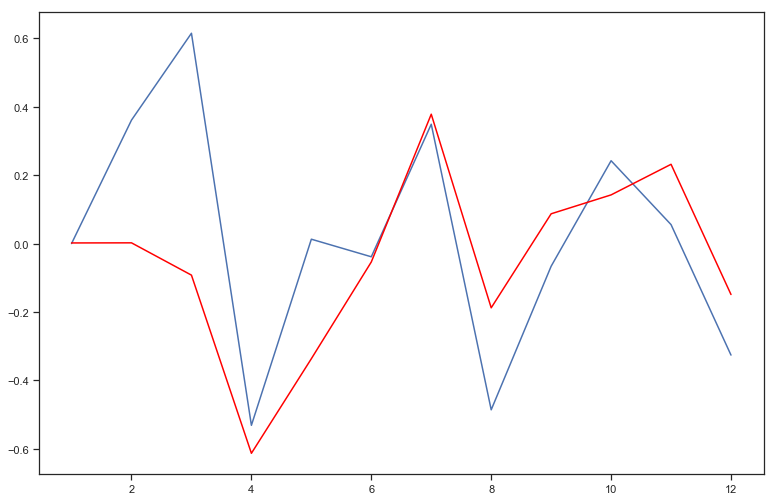

In [118]:
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')

Finding sum of Residual Sum of Squares(RSS) for evaluation of ARIMA model

In [119]:
RSS = (results_AR.fittedvalues-ts_diff)**2
RSS.fillna(0,inplace=True)
sum(RSS)

0.9448504282228017

RSS for various order combinations

1. RSS = 6.179 for order=(1,2,1)
2. RSS = 1.051 for order=(1,0,1)
3. RSS = 2.277 for order=(1,1,1)
4. RSS = 1.018 for order=(2,0,1)
5. RSS = 2.082 for order=(2,1,1)
6. RSS = 6.802 for order=(2,2,1)
7. RSS = 0.944 for order=(3,0,0)

order=(3,0,0) gives lowest RSS of 0.944. So, we will use order=(3,0,0)

In [120]:
preds = results_AR.predict(start=12,end=24)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [121]:
preds

12    0.001496
13    0.189999
14    0.109327
15   -0.191649
16   -0.081554
17    0.111858
18    0.122536
19   -0.090272
20   -0.099224
21    0.044382
22    0.107086
23   -0.022916
24   -0.083924
dtype: float64

In [122]:
preds = preds[1:]

In [123]:
predictions_ARIMA_diff = preds

In [124]:
predictions_ARIMA_diff

13    0.189999
14    0.109327
15   -0.191649
16   -0.081554
17    0.111858
18    0.122536
19   -0.090272
20   -0.099224
21    0.044382
22    0.107086
23   -0.022916
24   -0.083924
dtype: float64

In [125]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [126]:
ts_diff

Month of absence
1     0.000000
2     0.361165
3     0.615280
4    -0.531759
5     0.012739
6    -0.038715
7     0.349080
8    -0.486378
9    -0.066301
10    0.242313
11    0.055399
12   -0.326344
Name: absenteeism hours per month, dtype: float64

In [127]:
predictions_ARIMA_diff_cumsum

13    0.189999
14    0.299327
15    0.107678
16    0.026124
17    0.137982
18    0.260518
19    0.170246
20    0.071023
21    0.115404
22    0.222490
23    0.199574
24    0.115650
dtype: float64

In [128]:
predictions_ARIMA_log = pd.Series(4.8, index=range(13,25))
predictions_ARIMA_log
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [129]:
sum(ts_log)/12

4.622994503720343

In [130]:
predictions_ARIMA_log

13    4.989999
14    5.099327
15    4.907678
16    4.826124
17    4.937982
18    5.060518
19    4.970246
20    4.871023
21    4.915404
22    5.022490
23    4.999574
24    4.915650
dtype: float64

In [131]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [132]:
predictions_ARIMA

13    146.936325
14    163.911526
15    135.324769
16    124.726531
17    139.488433
18    157.672187
19    144.062393
20    130.454283
21    136.374447
22    151.788793
23    148.349911
24    136.407959
dtype: float64

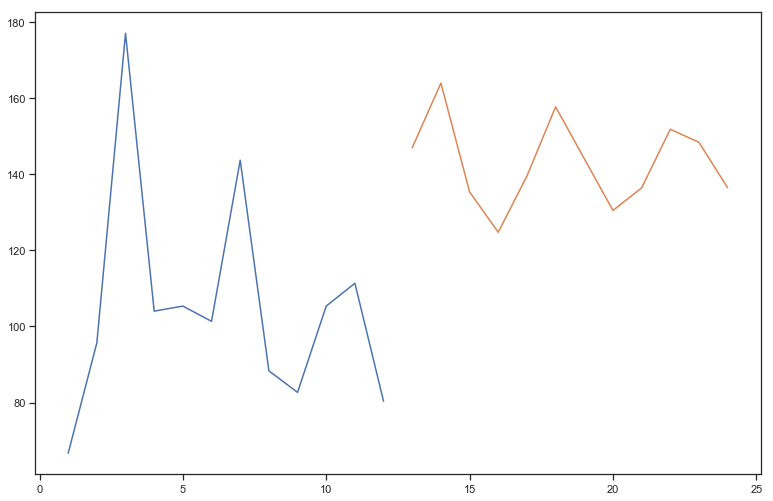

In [133]:
plt.plot(ts)
plt.plot(predictions_ARIMA)